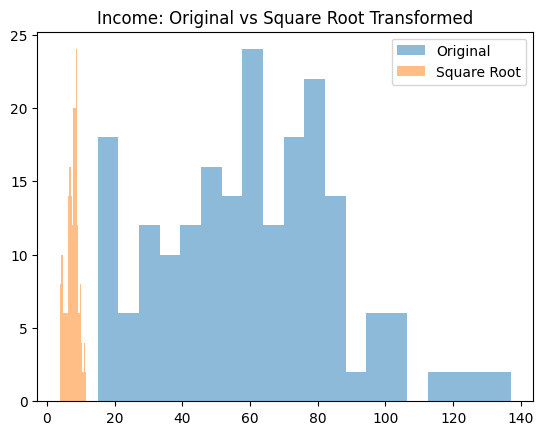

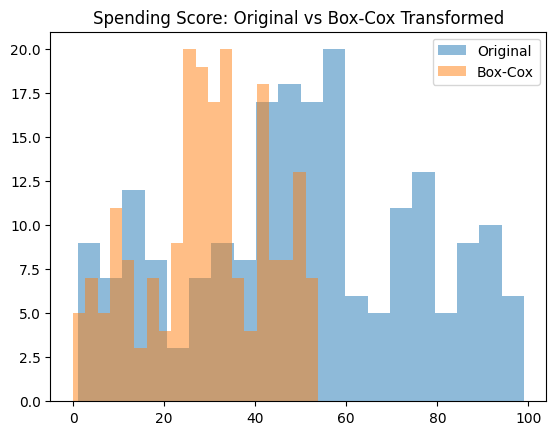

In [2]:
import numpy as np
from scipy.stats import boxcox
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('customers_dataset.csv')

income = df['Annual Income (k$)']

income_sqrt = np.sqrt(income)
df['Income_Sqrt'] = income_sqrt

spending = df['Spending Score (1-100)']

spending_boxcox, lambda_used = boxcox(spending)
df['Spending_BoxCox'] = spending_boxcox

plt.figure()
plt.hist(df['Annual Income (k$)'], bins=20, alpha=0.5, label='Original')
plt.hist(df['Income_Sqrt'], bins=20, alpha=0.5, label='Square Root')
plt.legend()
plt.title("Income: Original vs Square Root Transformed")
plt.show()

plt.figure()
plt.hist(df['Spending Score (1-100)'], bins=20, alpha=0.5, label='Original')
plt.hist(df['Spending_BoxCox'], bins=20, alpha=0.5, label='Box-Cox')
plt.legend()
plt.title("Spending Score: Original vs Box-Cox Transformed")
plt.show()

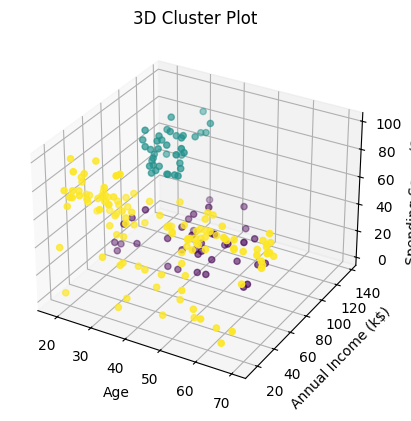

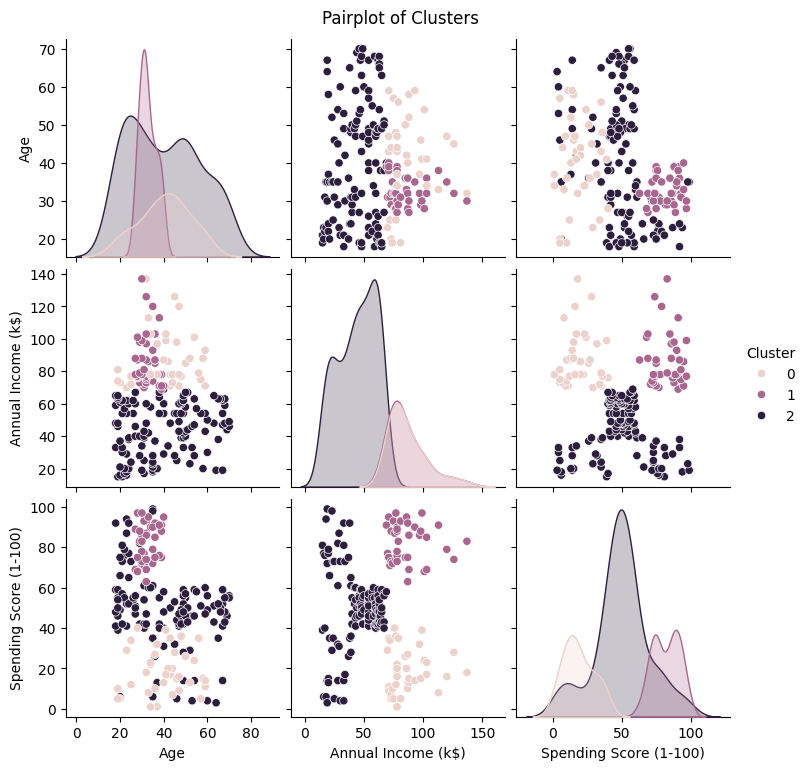

In [3]:
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans

x = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

model = KMeans(n_clusters=3, random_state=0)
model.fit(x)

df = pd.read_csv('customers_dataset.csv')

df['Cluster'] = model.labels_


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['Age'], df['Annual Income (k$)'], df['Spending Score (1-100)'],
           c=df['Cluster'], cmap='viridis')

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.title("3D Cluster Plot")

plt.show()

sns.pairplot(df, hue='Cluster', vars=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
plt.suptitle("Pairplot of Clusters", y=1.02)
plt.show()

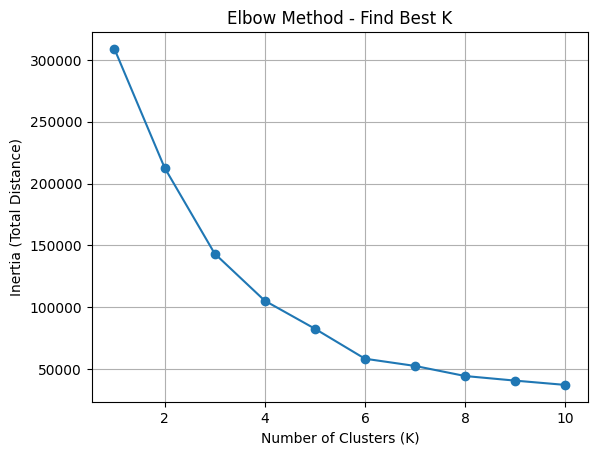

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv('customers_dataset.csv')

x = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

inertia_list = []

for k in range(1, 11):
    model = KMeans(n_clusters=k, random_state=0)    
    model.fit(x)
    inertia_list.append(model.inertia_)

plt.figure()
plt.plot(range(1, 11), inertia_list, marker='o')
plt.title("Elbow Method - Find Best K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (Total Distance)")
plt.grid(True)
plt.show()

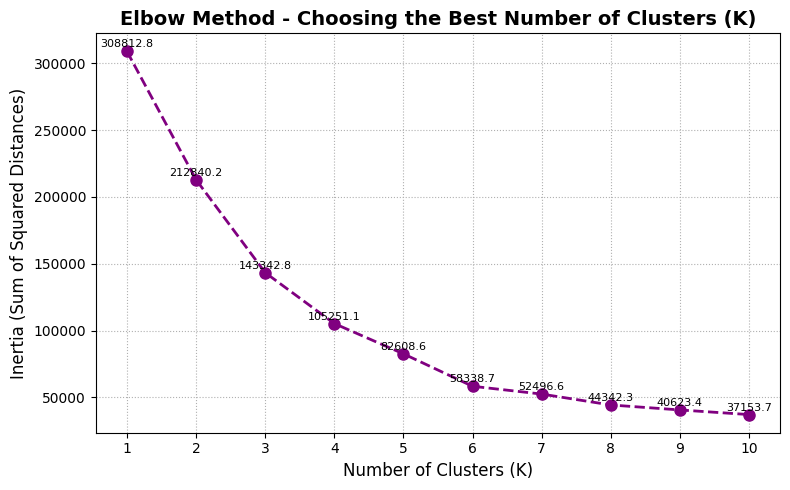

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv('customers_dataset.csv')

x = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

inertia_values = []

for k in range(1, 11):
    model = KMeans(n_clusters=k, random_state=0)
    model.fit(x)
    inertia_values.append(model.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia_values, color='purple', marker='o', linestyle='--', linewidth=2, markersize=8)

for i, value in enumerate(inertia_values):
    plt.text(i+1, value + 3000, str(round(value, 1)), ha='center', fontsize=8, color='black')

plt.grid(True, linestyle=':', linewidth=0.8)
plt.title("Elbow Method - Choosing the Best Number of Clusters (K)", fontsize=14, fontweight='bold')
plt.xlabel("Number of Clusters (K)", fontsize=12)
plt.ylabel("Inertia (Sum of Squared Distances)", fontsize=12)
plt.xticks(range(1, 11))
plt.tight_layout()
plt.show()